In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv("/dataset/T1.csv")
dataset.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [ ]:
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'], format='%d %m %Y %H:%M')

dataset.loc[dataset['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 1307.684332
dataset.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1309.159823,7.557952,1492.175463,123.687559
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2018-04-03 05:22:30,53.204888,4.201395,161.328167,49.315437
50%,2018-06-30 16:15:00,829.766357,7.104594,1063.776283,73.712978
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589
std,NaN,1311.722947,4.227166,1368.018238,93.443736


In [ ]:
dataset.isna().sum()

,0
Date/Time,0
LV ActivePower (kW),0
Wind Speed (m/s),0
Theoretical_Power_Curve (KWh),0
Wind Direction (°),0


In [ ]:
df = dataset.copy()


df.head()
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620


In [ ]:
df['Month'] = df['Date/Time'].dt.month
df['week'] = df['Date/Time'].dt.isocalendar().week
df['day'] = df['Date/Time'].dt.day
df['Hour']=df['Date/Time'].dt.hour
df.head(20)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,1,1,1,0
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,1,1,1,1
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,1,1,1,1
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,1,1,1,1
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,1,1,1,1


In [ ]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df['Seasons'] = df['Month'].map(seasons_dict)
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,1,31,23,Winter
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,1,31,23,Winter
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,1,31,23,Winter
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,1,31,23,Winter


In [ ]:
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Month', 'week',
       'day', 'Hour', 'Seasons'],
      dtype='object')

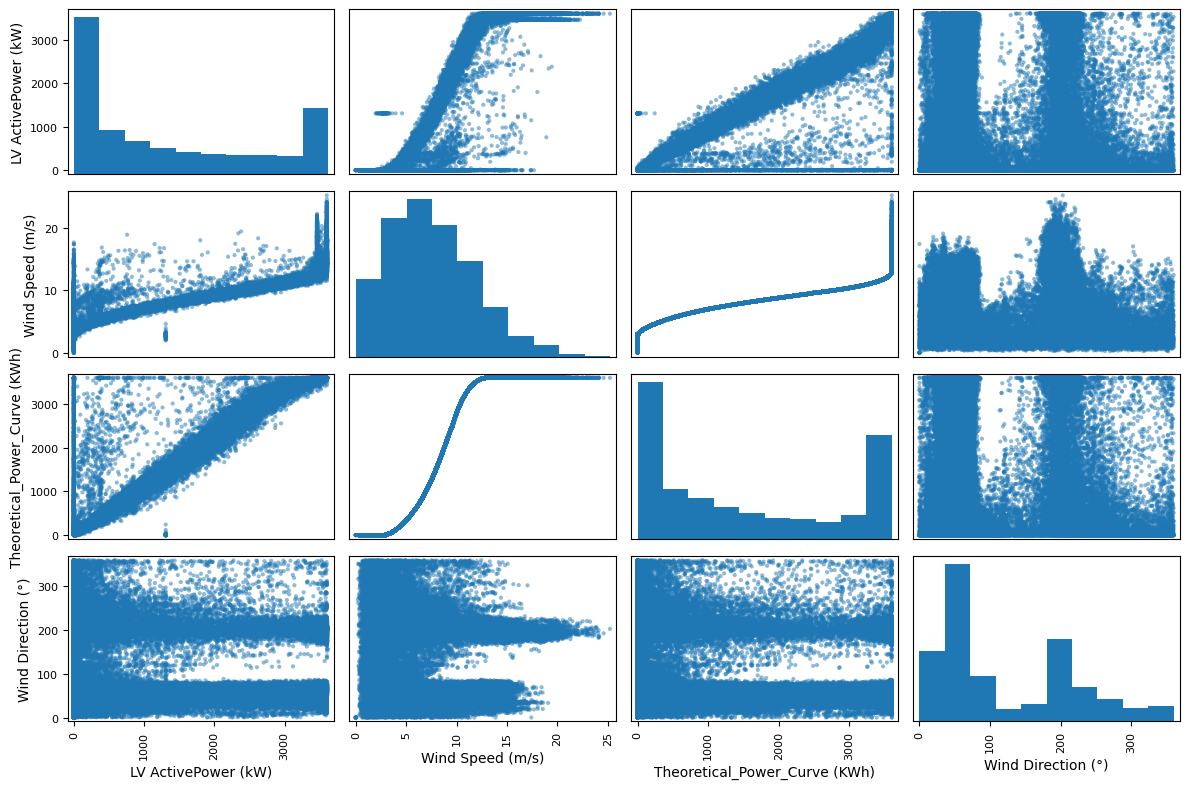

In [ ]:
columns_needed = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']

pd.plotting.scatter_matrix(df[columns_needed], figsize=(12, 8))
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'LV ActivePower (kW)'}>,
        <Axes: title={'center': 'Wind Speed (m/s)'}>],
       [<Axes: title={'center': 'Theoretical_Power_Curve (KWh)'}>,
        <Axes: title={'center': 'Wind Direction (°)'}>]], dtype=object)

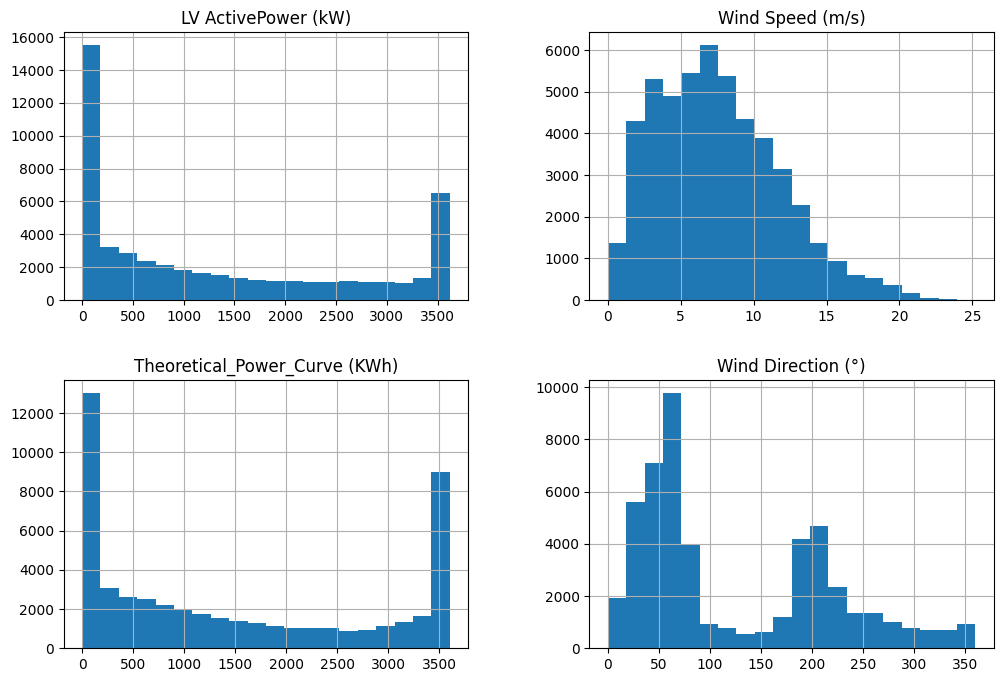

In [ ]:
df[columns_needed].hist(bins=20, figsize=(12,8))

In [ ]:
df.drop(columns=['Date/Time'], inplace=True)
df

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter
...,...,...,...,...,...,...,...,...,...
50525,2963.980957,11.404030,3397.190793,80.502724,12,1,31,23,Winter
50526,1684.353027,7.332648,1173.055771,84.062599,12,1,31,23,Winter
50527,2201.106934,8.435358,1788.284755,84.742500,12,1,31,23,Winter
50528,2515.694092,9.421366,2418.382503,84.297913,12,1,31,23,Winter


Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Month', 'week',
       'day', 'Hour'],
      dtype='object')


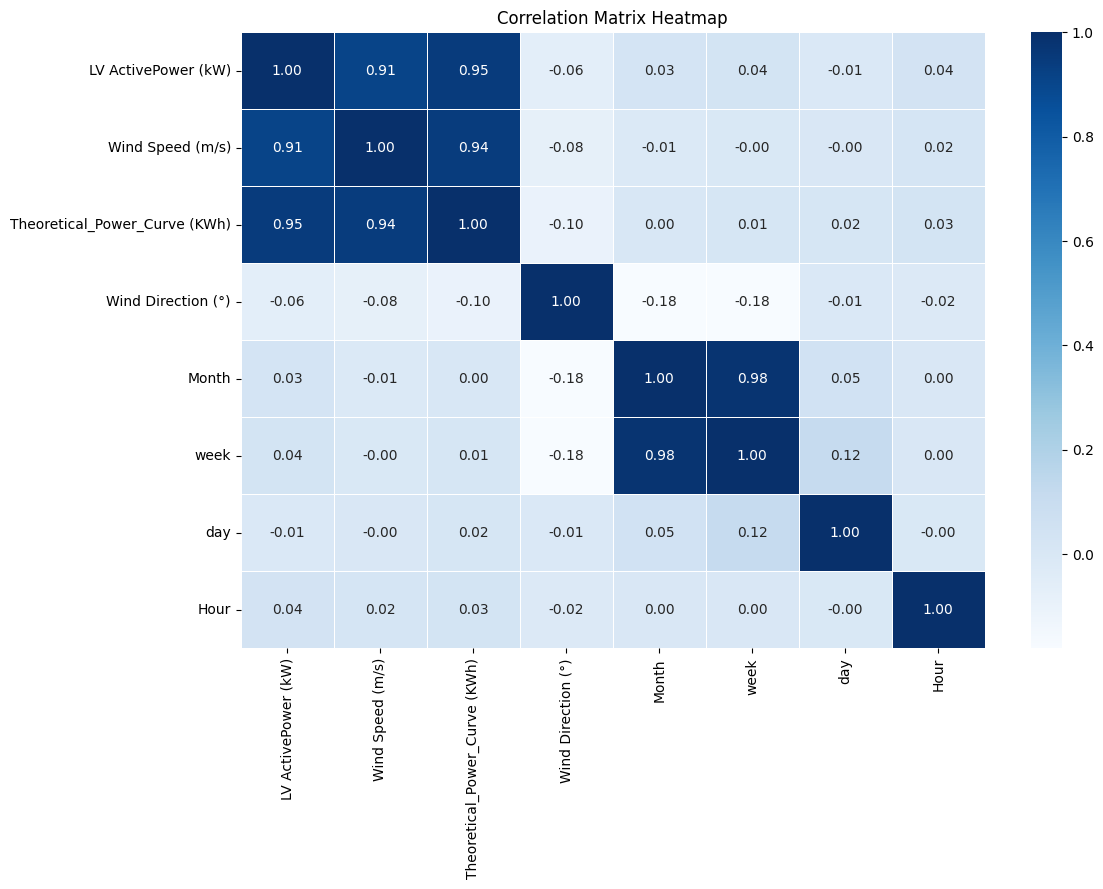

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_test

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
8057,2018-03-02 10:40:00,3348.910889,11.632760,3452.918718,188.499802,3,9,2,10,Winter
8059,2018-03-02 11:00:00,2647.506104,10.345970,2989.120313,190.715607,3,9,2,11,Winter
50250,2018-12-30 01:20:00,0.000000,6.430618,779.117347,29.279140,12,52,30,1,Winter
14774,2018-04-18 04:50:00,1334.573975,7.952174,1502.728868,49.509399,4,16,18,4,Spring
49374,2018-12-23 23:20:00,533.002808,5.906481,593.890170,278.626190,12,51,23,23,Winter
...,...,...,...,...,...,...,...,...,...,...
20904,2018-05-30 21:00:00,1241.927002,7.807554,1421.792289,49.330021,5,22,30,21,Spring
17208,2018-05-05 04:30:00,0.000000,3.097670,19.888598,340.675690,5,18,5,4,Spring
43820,2018-11-15 06:50:00,0.000000,3.144423,22.290177,156.084900,11,46,15,6,Autumn
43653,2018-11-10 12:20:00,961.278687,7.113429,1067.878448,65.963547,11,45,10,12,Autumn


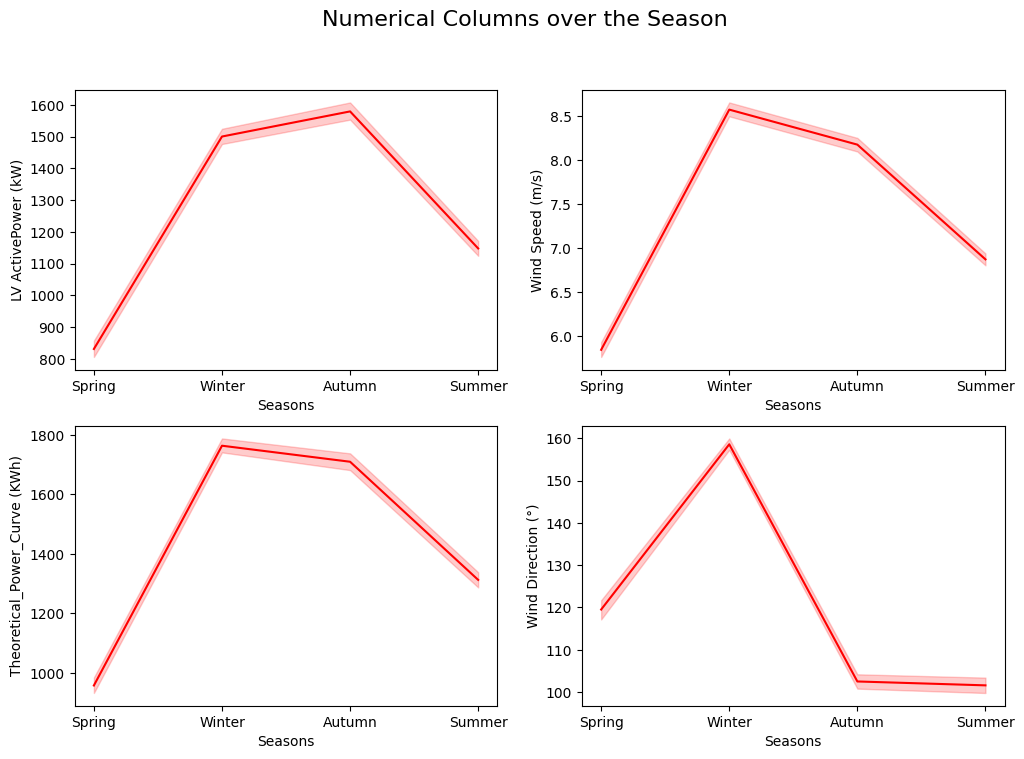

In [ ]:
fig,axes=plt.subplots(nrows=2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[columns_needed]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.show()

In [ ]:
for idx,col in enumerate(df_train[columns_needed]):
    row_idx=idx//2
    col_idx=idx%2
    print(f"row_indx === {row_idx} >>>> col =={col_idx}")


df.head()

row_indx === 0 >>>> col ==0
row_indx === 0 >>>> col ==1
row_indx === 1 >>>> col ==0
row_indx === 1 >>>> col ==1


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,week,day,Hour,Seasons
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0,Winter
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0,Winter
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0,Winter
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0,Winter
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,1,0,Winter


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']
df_train['Seasons'] = pd.Categorical(df_train['Seasons']).codes
df_test['Seasons'] = pd.Categorical(df_test['Seasons'], categories=df_train['Seasons'].unique()).codes


# Define the features (X) and the target (y)
X_train = df_train.drop(columns='LV ActivePower (kW)')
y_train = df_train['LV ActivePower (kW)']
X_test = df_test.drop(columns='LV ActivePower (kW)')
y_test = df_test['LV ActivePower (kW)']

print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

y_train

# Standardize the features and normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

print(X_train_scaled.shape)
print(X_test_scaled.shape)



(40424, 9)
(40424,)
(10106,)


TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regression": SVR()
}

In [ ]:
# Train & evaluate models
results = {}
model_scores = {}

for name, model in models.items():
    # Use scaled data for SVR, unscaled for others
    if name == "Support Vector Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    #  Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = r2


    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

# Print results
results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE        RMSE  R2 Score
Linear Regression          205.047554  430.808169  0.891082
Decision Tree              103.471026  301.591101  0.946621
Random Forest               86.444317  220.296706  0.971519
Gradient Boosting          130.643615  301.401248  0.946688
Support Vector Regression  541.657696  694.222695  0.717167


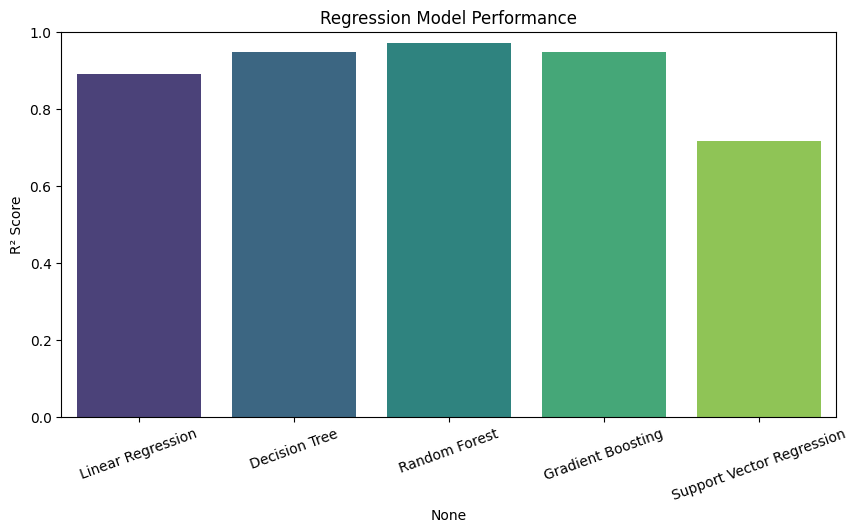

In [ ]:
scores_df = pd.DataFrame(model_scores.values(), index=model_scores.keys(), columns=['R² Score'])

# Plot the accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x=scores_df.index, y=scores_df['R² Score'], palette="viridis")
plt.ylabel("R² Score")
plt.title("Regression Model Performance")
plt.ylim(0, 1)  # R² ranges between -∞ to 1, but typically [0,1] for good models
plt.xticks(rotation=20)
plt.show()


# 2. Bar Plot: MAE & RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=results_df.index, y=results_df["MAE"], palette="viridis", ax=ax[0])
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_xticklabels(results_df.index, rotation=45)
ax[0].set_ylabel("MAE")

sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma", ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)")
ax[1].set_xticklabels(results_df.index, rotation=45)
ax[1].set_ylabel("RMSE")

plt.tight_layout()
plt.show()

# 2. Bar Plot: MAE & RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=results_df.index, y=results_df["MAE"], palette="viridis", ax=ax[0])
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_xticklabels(results_df.index, rotation=45)
ax[0].set_ylabel("MAE")

sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma", ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)")
ax[1].set_xticklabels(results_df.index, rotation=45)
ax[1].set_ylabel("RMSE")

plt.tight_layout()
plt.show()

Testing Deep Learning Models like RNN and LSTM

In [ ]:
dataset = pd.read_csv('T1.csv')
dataset.head()

dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'], format="%d %m %Y %H:%M", errors='coerce')
dataset.set_index('Date/Time', inplace=True)
features = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']  # Select relevant features
dataset = dataset[features].dropna()

dataset.head()

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
2018-01-01 00:00:00,380.047791,5.311336,259.994904
2018-01-01 00:10:00,453.769196,5.672167,268.641113
2018-01-01 00:20:00,306.376587,5.216037,272.564789
2018-01-01 00:30:00,419.645905,5.659674,271.258087
2018-01-01 00:40:00,380.650696,5.577941,265.674286


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = dataset.values
data

array([[ 380.04779053,    5.31133604,  259.99490356],
       [ 453.76919556,    5.67216682,  268.64111328],
       [ 306.37658691,    5.2160368 ,  272.56478882],
       ...,
       [2201.10693359,    8.43535805,   84.74250031],
       [2515.6940918 ,    9.42136574,   84.2979126 ],
       [2820.46606445,    9.97933197,   82.27462006]])

In [ ]:
# Split data into Training (80%) and Testing (20%) **before scaling**
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
train_data, test_data = data[:train_size], data[train_size:]

# Create MinMaxScaler and fit only on training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)  #  Fit only on training
test_data_scaled = scaler.transform(test_data)  # Transform only on test set

# Further split training data into Training (90%) and Validation (10%)
val_size = int(0.1 * len(train_data_scaled))  # 10% of training for validation
train_data_final, val_data = train_data_scaled[:-val_size], train_data_scaled[-val_size:]

In [ ]:
# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Assuming the first feature is the target
    return np.array(X), np.array(y)




In [ ]:
time_step = 10  # You can adjust this value

X_train, y_train = create_sequences(train_data_final, time_step)
X_val, y_val = create_sequences(val_data, time_step)
X_test, y_test = create_sequences(test_data_scaled, time_step)


print(f'X_train >>> {X_train.shape} ---- y_train >> {y_train.shape}')
print(f'X_val >>> {X_val.shape} ----- y_val >> {y_val.shape}')
print(f'X_test >>> {X_test.shape} ----- y_test >> {y_test.shape}')

print(train_data_final.shape, val_data.shape, test_data_scaled.shape)

X_train >>> (36372, 10, 3) ---- y_train >> (36372,)
X_val >>> (4032, 10, 3) ----- y_val >> (4032,)
X_test >>> (10096, 10, 3) ----- y_test >> (10096,)
(36382, 3) (4042, 3) (10106, 3)


SIMPLE RNN ARCHITECTURE WITH LSTM LAYERS

In [ ]:
# Define the RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 3)),  # First LSTM layer
    LSTM(50, return_sequences=False),  # Second LSTM layer
    Dense(25, activation='relu'),  # Dense hidden layer
    Dense(1)  # Output layer (regression)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0202 - mae: 0.0810 - val_loss: 0.0056 - val_mae: 0.0527
Epoch 2/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0044 - mae: 0.0385 - val_loss: 0.0053 - val_mae: 0.0482
Epoch 3/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0048 - mae: 0.0393 - val_loss: 0.0055 - val_mae: 0.0489
Epoch 4/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0046 - mae: 0.0379 - val_loss: 0.0054 - val_mae: 0.0500
Epoch 5/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0047 - mae: 0.0386 - val_loss: 0.0071 - val_mae: 0.0614
Epoch 6/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 0.0045 - mae: 0.0376 - val_loss: 0.0055 - val_mae: 0.0491
Epoch 7/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 0.0044 - mae: 0.0373 - val_loss: 0.0056 - val_mae: 0.0502
Epoch 8/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.0044 - mae: 0.0371 - val_loss: 0.0054 - val_mae: 0.0467
Epoch 9/50
1137/1137 ━━━

In [ ]:
# Assuming X_test and y_test are loaded
# Example: X_test, y_test = ...

# Make predictions on the test set
y_pred = model.predict(X_test)

# Flatten predictions if necessary for compatibility with metrics/plotting
y_pred_flat = y_pred.flatten()

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Evaluate the model using the compiled metrics ---
print("--- Model Evaluation on Test Data ---")
# y_test should also be flat if it's not already
y_test_flat = y_test.flatten() if y_test.ndim > 1 else y_test

loss, mae = model.evaluate(X_test, y_test, verbose=0) # verbose=0 for cleaner output

print(f"Test Loss (MSE): {loss:.4f}") # Note: loss is the MSE you compiled with
print(f"Test MAE: {mae:.4f}")

# --- Calculate additional metrics using sklearn ---

# Calculate MSE (should be very close to the 'loss' above)
test_mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f"Calculated Test MSE: {test_mse:.4f}")

# Calculate RMSE
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse:.4f}")

# Calculate MAE (should be very close to the 'mae' above)
test_mae = mean_absolute_error(y_test_flat, y_pred_flat)
print(f"Calculated Test MAE: {test_mae:.4f}")

# Calculate R-squared
test_r2 = r2_score(y_test_flat, y_pred_flat)
print(f"Test R-squared (R2) Score: {test_r2:.4f}")

print("-" * 30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Define the path to your saved model file
model_path = 'lstm_model.h5'

# --- Assume X_test and y_test are already loaded and preprocessed ---
# For demonstration purposes, let's create dummy X_test data
# Replace this with your actual X_test loading/preparation
# Example: Assuming X_test has shape (number_of_samples, time_steps, features)
# time_steps = 10
# features = 3
# num_test_samples = 100
# X_test = np.random.rand(num_test_samples, time_steps, features)
# y_test = np.random.rand(num_test_samples, 1) # Dummy y_test if needed later

print(f"Assuming X_test is already loaded and available.")
# Make sure X_test is a numpy array in the correct shape for your model

# --- Load the saved model ---
try:
    loaded_model = load_model(model_path)
    print(f"Model successfully loaded from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    # Exit or handle the error appropriately if the model fails to load
    exit()

# Display the summary of the loaded model to verify
loaded_model.summary()

# --- Make predictions using the loaded model ---
print("Making predictions on X_test...")
try:
    y_pred = loaded_model.predict(X_test)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    # Handle prediction error

# --- Flatten predictions if necessary ---
# The output shape of model.predict depends on the model architecture.
# If your output layer is Dense(1), y_pred will likely have shape (num_samples, 1).
# Flattening is often useful for comparing with a 1D target array (y_test).
y_pred_flat = y_pred.flatten()

print(f"Original prediction shape: {y_pred.shape}")
print(f"Flattened prediction shape: {y_pred_flat.shape}")

# You can now use y_pred or y_pred_flat for evaluation (e.g., calculating MSE, MAE)
# Example:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# mse = mean_squared_error(y_test, y_pred) # Use y_pred or y_pred_flat depending on y_test shape
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Squared Error on test set: {mse}")
# print(f"Mean Absolute Error on test set: {mae}")

# Display the first few predictions
print("\nFirst 10 predictions (flattened):")
print(y_pred_flat[:10])

# Display the first few actual values from y_test (assuming y_test is available)
# print("\nFirst 10 actual values (from y_test):")
# print(y_test[:10].flatten()) # Flatten y_test if it's also (num_samples, 1)


Assuming X_test is already loaded and available.
Model successfully loaded from /content/lstm_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,303 (126.19 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Making predictions on X_test...


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
Predictions made successfully.
Original prediction shape: (150, 1)
Flattened prediction shape: (150,)

First 10 predictions (flattened):
[0.25441545 0.363725   0.7468722  0.5680026  0.06649648 0.42416835
 0.2344302  0.55113876 0.54032254 0.5081798 ]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math # Import math for sqrt

# Define the path to your saved model file
model_path = 'lstm_model.h5'

# --- Assume X_test and y_test are already loaded and preprocessed ---
# Make sure X_test and y_test are numpy arrays in the correct shapes for your model and evaluation
# X_test should have shape (number_of_samples, time_steps, features)
# y_test should have shape (number_of_samples, 1) or (number_of_samples,)

print(f"Assuming X_test and y_test are already loaded and available.")
# Example of how you might load them (uncomment and modify as needed):
# X_test = np.load('path/to/your/X_test.npy')
# y_test = np.load('path/to/your/y_test.npy')


# --- Load the saved model ---
try:
    loaded_model = load_model(model_path)
    print(f"Model successfully loaded from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")
    # Exit or handle the error appropriately if the model fails to load
    # In a real script, you might want to sys.exit(1) or raise the exception
    exit() # Exit if model loading fails


# Display the summary of the loaded model to verify
loaded_model.summary()


# --- Make predictions using the loaded model ---
print("Making predictions on X_test...")
try:
    y_pred = loaded_model.predict(X_test)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    # Handle prediction error
    # In a real script, you might want to sys.exit(1) or raise the exception
    exit() # Exit if prediction fails


# --- Flatten predictions and actual values if necessary for metric calculation ---
# Ensure y_test is also in a compatible shape (e.g., flattened)
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten() # Flatten y_test if it's (num_samples, 1)

print(f"Original prediction shape: {y_pred.shape}")
print(f"Flattened prediction shape: {y_pred_flat.shape}")
print(f"Original y_test shape: {y_test.shape}")
print(f"Flattened y_test shape: {y_test_flat.shape}")


# --- Calculate Evaluation Metrics ---
print("\n--- Model Evaluation on Test Data ---")

try:
    # Calculate MSE
    mse = mean_squared_error(y_test_flat, y_pred_flat)
    print(f"Test Loss (MSE): {mse:.4f}")
    print(f"Calculated Test MSE: {mse:.4f}") # Print again as requested format

    # Calculate MAE
    mae = mean_absolute_error(y_test_flat, y_pred_flat)
    print(f"Test MAE: {mae:.4f}")
    print(f"Calculated Test MAE: {mae:.4f}") # Print again as requested format

    # Calculate RMSE (Root Mean Squared Error)
    rmse = math.sqrt(mse)
    print(f"Test RMSE: {rmse:.4f}")

    # Calculate R-squared (R2) Score
    r2 = r2_score(y_test_flat, y_pred_flat)
    print(f"Test R-squared (R2) Score: {r2:.4f}")

except Exception as e:
    print(f"Error calculating metrics: {e}")
    print("Please ensure y_test is correctly loaded and has a compatible shape with y_pred.")


# Display the first few predictions
print("\nFirst 10 predictions (flattened):")
print(y_pred_flat[:10])

# Display the first few actual values from y_test
print("\nFirst 10 actual values (from y_test):")
print(y_test_flat[:10])


Assuming X_test and y_test are already loaded and available.
Model successfully loaded from /content/lstm_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,303 (126.19 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Making predictions on X_test...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Predictions made successfully.
Original prediction shape: (150, 1)
Flattened prediction shape: (150,)
Original y_test shape: (150,)
Flattened y_test shape: (150,)

--- Model Evaluation on Test Data ---
Test Loss (MSE): 233.2795
Calculated Test MSE: 233.2795
Test MAE: 14.4845
Calculated Test MAE: 14.4845
Test RMSE: 15.2735
Test R-squared (R2) Score: -8.8918

First 10 predictions (flattened):
[0.25441545 0.363725   0.7468722  0.5680026  0.06649648 0.42416835
 0.2344302  0.55113876 0.54032254 0.5081798 ]

First 10 actual values (from y_test):
[19.33481  19.755447 13.524696 20.06461  10.964171 18.211565 21.513866
 18.781008  5.373029 13.478751]


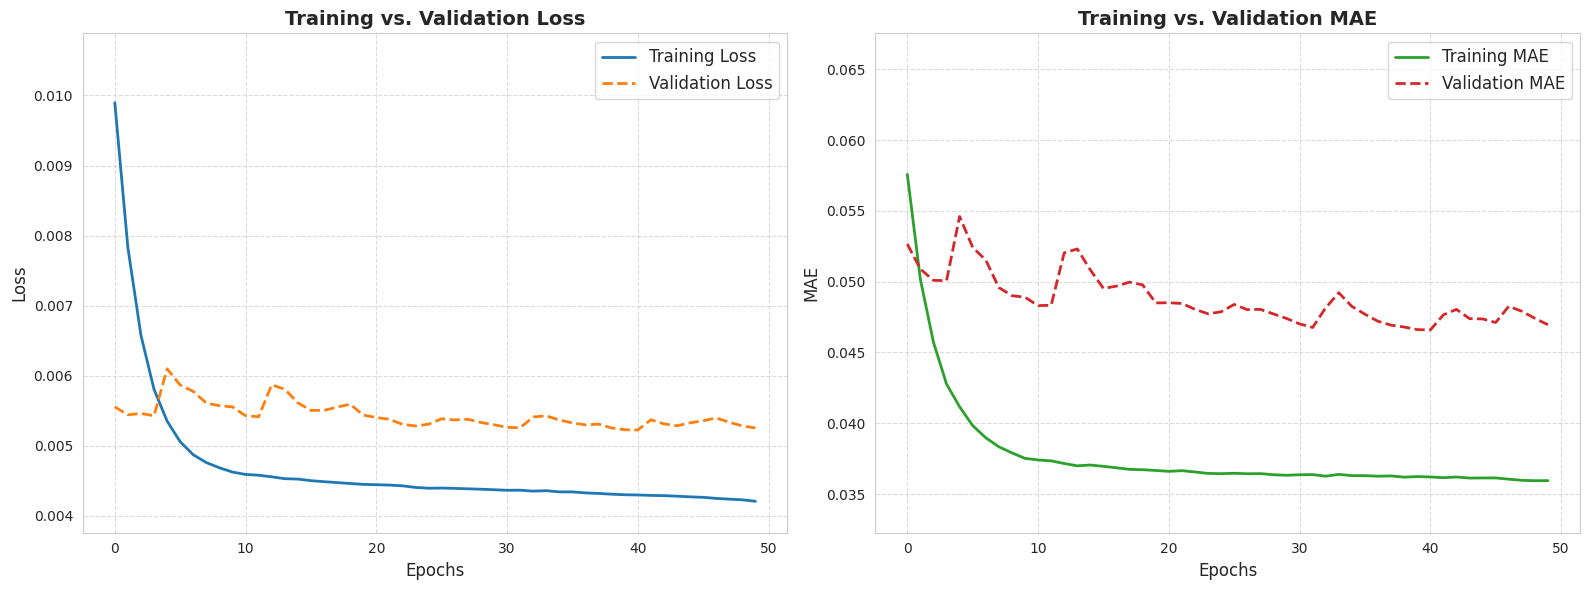

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply Seaborn theme for a more professional look
sns.set_style("whitegrid")

# Function to apply moving average smoothing
def smooth_curve(values, smoothing=0.6):
    smoothed_values = []
    prev = values[0]  # Start with the first value
    for v in values:
        smoothed_val = prev * smoothing + v * (1 - smoothing)
        smoothed_values.append(smoothed_val)
        prev = smoothed_val
    return smoothed_values

# Extract loss and MAE data from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Smooth the curves for better visualization
train_loss_smooth = smooth_curve(train_loss, 0.6)
val_loss_smooth = smooth_curve(val_loss, 0.6)
train_mae_smooth = smooth_curve(train_mae, 0.6)
val_mae_smooth = smooth_curve(val_mae, 0.6)

# Create subplots for Loss and MAE
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training & Validation Loss
axs[0].plot(train_loss_smooth, label='Training Loss', color='#1f77b4', linewidth=2)
axs[0].plot(val_loss_smooth, label='Validation Loss', color='#ff7f0e', linewidth=2, linestyle='dashed')
axs[0].set_title('Training vs. Validation Loss', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend(fontsize=12, loc='upper right')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].set_ylim(min(min(train_loss), min(val_loss)) * 0.9, max(max(train_loss), max(val_loss)) * 1.1)

# Plot 2: Training & Validation MAE
axs[1].plot(train_mae_smooth, label='Training MAE', color='#2ca02c', linewidth=2)
axs[1].plot(val_mae_smooth, label='Validation MAE', color='#d62728', linewidth=2, linestyle='dashed')
axs[1].set_title('Training vs. Validation MAE', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('MAE', fontsize=12)
axs[1].legend(fontsize=12, loc='upper right')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].set_ylim(min(min(train_mae), min(val_mae)) * 0.9, max(max(train_mae), max(val_mae)) * 1.1)

# Improve layout
plt.tight_layout()
plt.show()




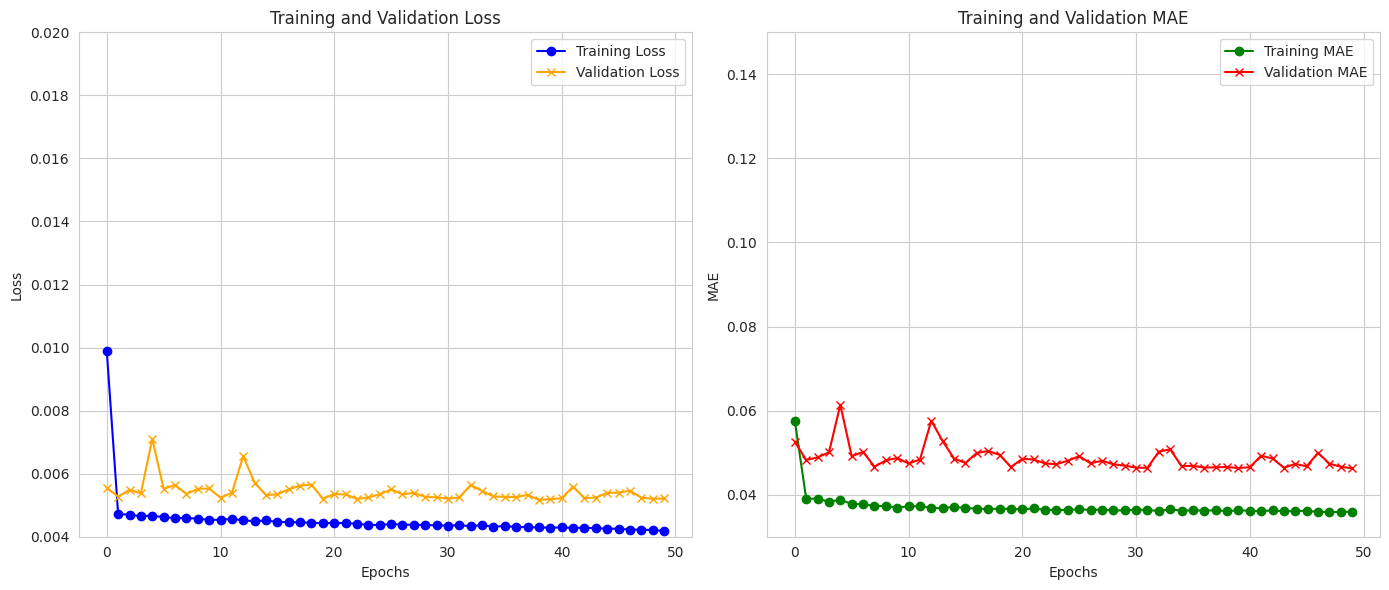

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for Loss and MAE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot training & validation loss
axs[0].plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim(0.004, 0.020)  # Set y-axis range

# Plot training & validation MAE
axs[1].plot(history.history['mae'], label='Training MAE', color='green', marker='o')
axs[1].plot(history.history['val_mae'], label='Validation MAE', color='red', marker='x')
axs[1].set_title('Training and Validation MAE')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(0.03, 0.15)  # Set y-axis range

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(X_test)

print(y_pred.shape)

y_pred = y_pred.flatten()
y_pred.shape

# Ensure scaled_data is properly defined before using its shape
num_features = 3  # Update this based on your dataset

# Create a full array for inverse transformation
y_pred_full = np.zeros((y_pred.shape[0], num_features))  # Use the same number of features as original data
y_pred_full[:, 0] = y_pred.flatten()  # Insert predictions into the first column

# Apply inverse transformation
y_pred_inverse = scaler.inverse_transform(y_pred_full)[:, 0]  # Extract only the first column

# If y_test was also scaled, inverse transform it for comparison
y_test_full = np.zeros((y_test.shape[0], num_features))  # Use the same number of features
y_test_full[:, 0] = y_test.flatten()
y_test_inverse = scaler.inverse_transform(y_test_full)[:, 0]  # Extract only the first column



NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Print the R² score
print("R² Score:", r2)

NameError: name 'y_test_inverse' is not defined

Evaluation Metrics

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure these variables hold the inverse-transformed test set values
# y_test_inverse = ... (true values in original scale)
# y_pred_inverse = ... (predicted values in original scale)

# Calculate the metrics
mae_test = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse_test = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse_test = np.sqrt(mse_test) # RMSE is the square root of MSE
r2_test = r2_score(y_test_inverse, y_pred_inverse) # Or use the 'r2' variable you already calculated

# Print the calculated metrics
print(f"Test Set Evaluation Metrics:")
print(f"--------------------------")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE):  {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R²) Score:    {r2_test:.4f}") # Use the variable 'r2' from your code

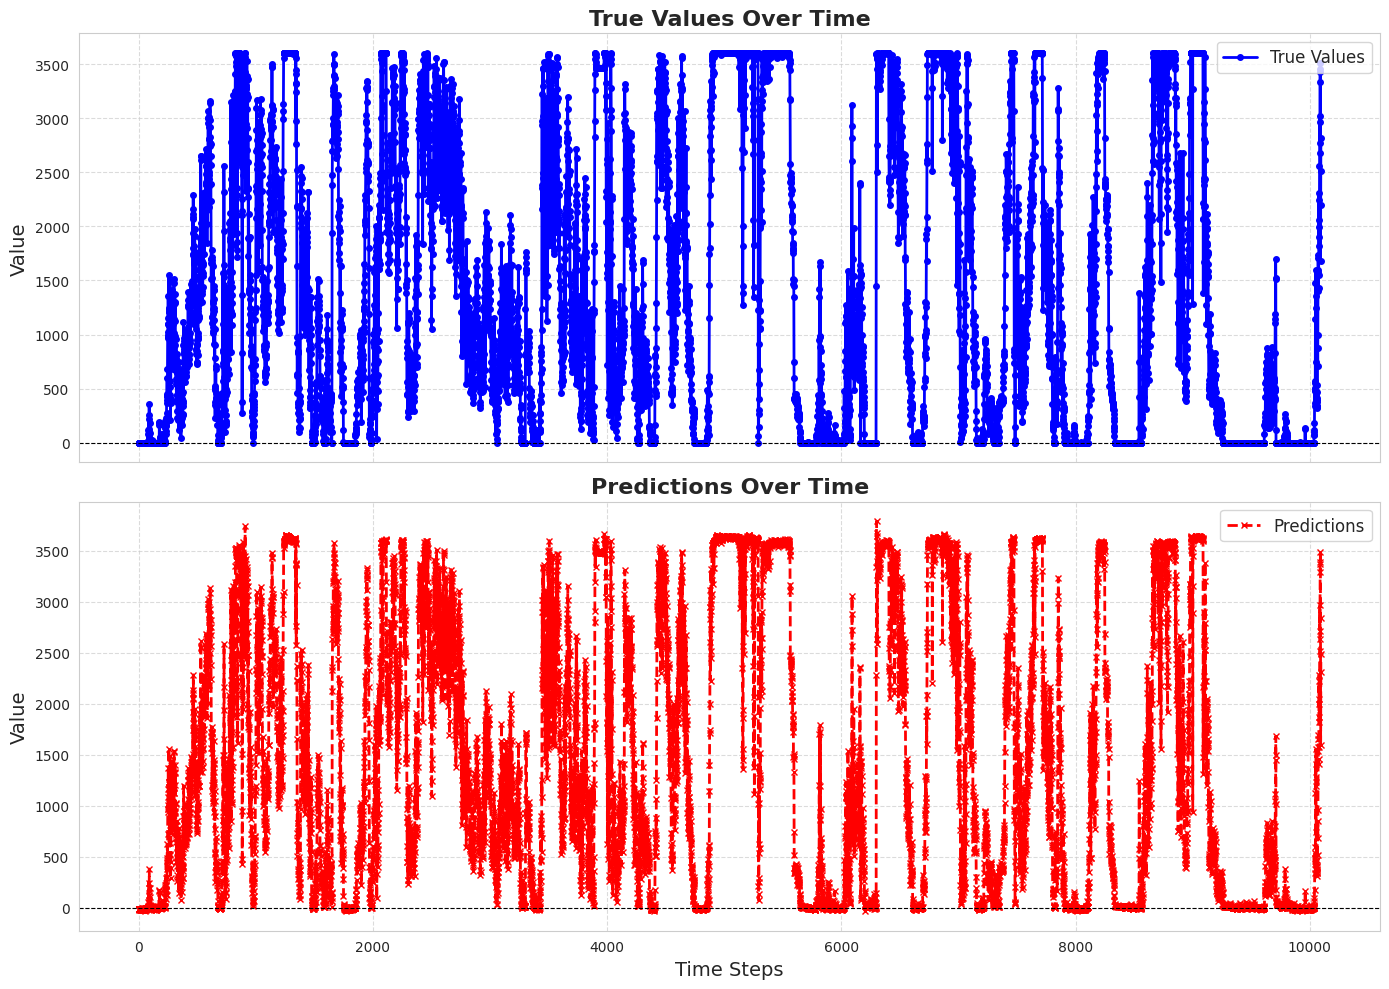

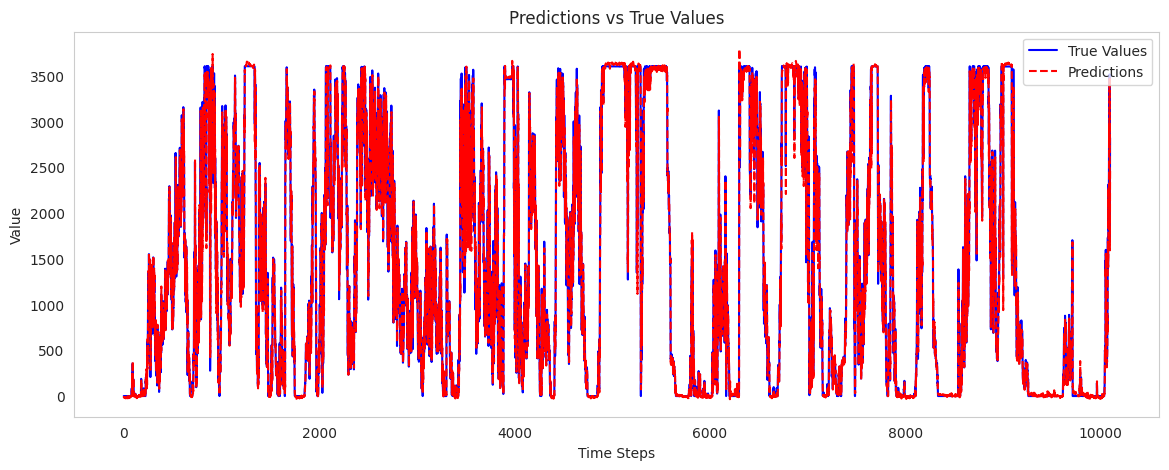

In [ ]:
# Create a time array
time_steps = np.arange(len(y_test_inverse))

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot True Values
axs[0].plot(time_steps, y_test_inverse, label='True Values', color='blue', linestyle='-', linewidth=2, marker='o', markersize=4)
axs[0].set_title('True Values Over Time', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Value', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(visible=True, linestyle='--', alpha=0.7)

# Plot Predictions
axs[1].plot(time_steps, y_pred_inverse, label='Predictions', color='red', linestyle='--', linewidth=2, marker='x', markersize=4)
axs[1].set_title('Predictions Over Time', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Time Steps', fontsize=14)
axs[1].set_ylabel('Value', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(visible=True, linestyle='--', alpha=0.7)

# Add a reference horizontal line at y=0
for ax in axs:
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Improve spacing
plt.tight_layout()
plt.show()

# Plot Predictions vs True Values
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='True Values', color='blue')
plt.plot(y_pred_inverse, label='Predictions', color='red', linestyle="dashed")
plt.title('Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Example: A single new row of data (Current Date-Time)
new_example_data = pd.DataFrame({
    'Date/Time': [pd.Timestamp('2025-03-14 15:30')],  # Current Date-Time
    'LV ActivePower (kW)': [120.5],  # Random power value
    'Wind Speed (m/s)': [8.2],  # Random wind speed
    'Wind Direction (°)': [190.3]  # Random wind direction
})

print(new_example_data)


            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2025-03-14 15:30:00                120.5               8.2   

   Wind Direction (°)  
0               190.3  


In [ ]:
# Ensure it matches the format of training data
new_example_data['Date/Time'] = pd.to_datetime(new_example_data['Date/Time'])
new_example_data.set_index('Date/Time', inplace=True)

# Select relevant features
new_example_data = new_example_data[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']]

# Scale the new data using the same MinMaxScaler (DO NOT FIT AGAIN)
new_example_scaled = scaler.transform(new_example_data)

# Convert into sequence (time_step=10) - Repeat last value if needed
time_step = 10
if len(new_example_scaled) < time_step:
    new_example_scaled = np.vstack([new_example_scaled] * (time_step - len(new_example_scaled) + 1))  # Padding if less data

X_new = new_example_scaled[-time_step:].reshape(1, time_step, 3)  # Reshape for LSTM input

print(f"New Input Shape: {X_new.shape}")  # Should be (1, 10, 3)


New Input Shape: (1, 10, 3)


In [ ]:
# Predict using the trained model
predicted_scaled = model.predict(X_new)

# Inverse transform to get actual values
predicted_power = scaler.inverse_transform(
    np.hstack((predicted_scaled.reshape(-1, 1), np.zeros((1, 2))))
)[:, 0]  # Only take the first column (LV ActivePower)

# Show the prediction result
print(f"🔹 Predicted Power Output (kW) for {new_example_data.index[0]}: {predicted_power[0]:.2f} kW")


NameError: name 'model' is not defined

In [ ]:
# Save the model in HDF5 format
model.save("lstm_model.h5")
print("✅ Model saved successfully as 'lstm_model.h5'")


✅ Model saved successfully as 'lstm_model.h5'


NEW OPTIMISED LSTM MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, Attention, Input
from tensorflow.keras.models import Model

# Define the input shape
input_layer = Input(shape=(10, 3))

# First Bidirectional LSTM Layer
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2))(input_layer)

# Second Bidirectional LSTM Layer
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2))(x)

# Attention Layer
attention = Dense(1, activation='tanh')(x)
attention = tf.keras.layers.Flatten()(attention)
attention = tf.keras.layers.Activation('softmax')(attention)
attention = tf.keras.layers.RepeatVector(200)(attention)
attention = tf.keras.layers.Permute([2, 1])(attention)
x = tf.keras.layers.Multiply()([x, attention])
x = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x, axis=1))(x)

# Fully connected layers
x = Dense(50, activation='relu')(x)
x = Dense(25, activation='relu')(x)
output_layer = Dense(1)(x)  # Regression output

# Create model
optimized_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimized_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary
optimized_model.summary()

# Train the model
history_optimized = optimized_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 10, 200)   │     83,200 │ input_layer_1[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 10, 200)   │    240,800 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10, 1)     │        201 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 10)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 10)        │          0 │ flatten_1[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 200, 10)   │          0 │ activation_1[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_1 (Permute) │ (None, 10, 200)   │          0 │ repeat_vector_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 10, 200)   │          0 │ bidirectional_3[… │
│ (Multiply)          │                   │            │ permute_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 200)       │          0 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 50)        │     10,050 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 25)        │      1,275 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         26 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 335,552 (1.28 MB)

 Trainable params: 335,552 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - loss: 0.0267 - mae: 0.1003 - val_loss: 0.0281 - val_mae: 0.1313
Epoch 2/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 72s 64ms/step - loss: 0.0123 - mae: 0.0636 - val_loss: 0.0216 - val_mae: 0.1142
Epoch 3/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - loss: 0.0103 - mae: 0.0574 - val_loss: 0.0237 - val_mae: 0.1209
Epoch 4/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 66s 58ms/step - loss: 0.0098 - mae: 0.0549 - val_loss: 0.0186 - val_mae: 0.1061
Epoch 5/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 64s 56ms/step - loss: 0.0101 - mae: 0.0546 - val_loss: 0.0177 - val_mae: 0.1019
Epoch 6/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 87s 61ms/step - loss: 0.0099 - mae: 0.0544 - val_loss: 0.0203 - val_mae: 0.1092
Epoch 7/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - loss: 0.0097 - mae: 0.0538 - val_loss: 0.0157 - val_mae: 0.0955
Epoch 8/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 77s 57ms/step - loss: 0.0096 - mae: 0.0530 - val_loss: 0.0226 - val_mae: 0.1156
Epoch 9/50
1137/1137 ━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, Attention, Input
from tensorflow.keras.models import Model

# Save the model in HDF5 format
model.save("optimised_lstm_model.h5")
print("✅ Model saved successfully as 'optimised_lstm_model.h5'")

In [ ]:
import tensorflow as tf

# Assuming 'optimized_model' is your trained model object
# ... (Your model definition and training code here)

# Define the path where you want to save the model
# It's a directory path, not a file name
save_directory = 'optimised_lstm_model.keras' # You can change this path

# Save the entire model in the SavedModel format
# This will create a directory named 'my_trained_model_savedmodel'
try:
    optimized_model.save(save_directory)
    print(f"Model successfully saved to: {save_directory}")
except Exception as e:
    print(f"Error saving model: {e}")


# --- How to Load This Model Later ---
# loaded_model = tf.keras.models.load_model(save_directory)
# print("Model successfully loaded!")
# loaded_model.summary() # You can check the loaded model summary

Model successfully saved to: /content/optimised_lstm_model.keras


In [ ]:
# Load the model
from tensorflow.keras.models import load_model

history_optimized = load_model(r"optimised_lstm_model.keras", compile=True)
print("✅ Model loaded successfully from 'optimized_lstm_model.keras")


ValueError: The `{arg_name}` of this `Lambda` layer is a Python lambda. Deserializing it is unsafe. If you trust the source of the config artifact, you can override this error by passing `safe_mode=False` to `from_config()`, or calling `keras.config.enable_unsafe_deserialization().

In [ ]:
# Assuming you have loaded your test data into X_test and y_test
# Example:
# (X_train, y_train), (X_val, y_val), (X_test, y_test) = load_your_data(...)

# Make predictions on the test set
y_pred = optimized_model.predict(X_test)

# model.predict typically returns a shape (n_samples, 1) for a single output unit.
# For compatibility with sklearn metrics and plotting, it's often useful to flatten it
y_pred_flat = y_pred.flatten()

316/316 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Evaluate the model using the compiled metrics ---
print("--- Model Evaluation on Test Data ---")
loss, mae = optimized_model.evaluate(X_test, y_test, verbose=0) # verbose=0 keeps output clean

print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# --- Calculate additional metrics using sklearn ---
# Ensure y_test is also in a compatible shape (like flat) if it's not already
y_test_flat = y_test.flatten() if y_test.ndim > 1 else y_test

# Calculate MSE (should be same as the 'loss' from evaluate if loss was MSE)
test_mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f"Calculated Test MSE: {test_mse:.4f}")

# Calculate RMSE
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse:.4f}")

# Calculate MAE (should be same as the 'mae' from evaluate)
test_mae = mean_absolute_error(y_test_flat, y_pred_flat)
print(f"Calculated Test MAE: {test_mae:.4f}")

# Calculate R-squared
test_r2 = r2_score(y_test_flat, y_pred_flat)
print(f"Test R-squared (R2) Score: {test_r2:.4f}")

print("-" * 30)

--- Model Evaluation on Test Data ---
Test Loss (MSE): 0.0193
Test MAE: 0.0994
Calculated Test MSE: 0.0193
Test RMSE: 0.1390
Calculated Test MAE: 0.0994
Test R-squared (R2) Score: 0.8594
------------------------------



--- Generating Plots ---


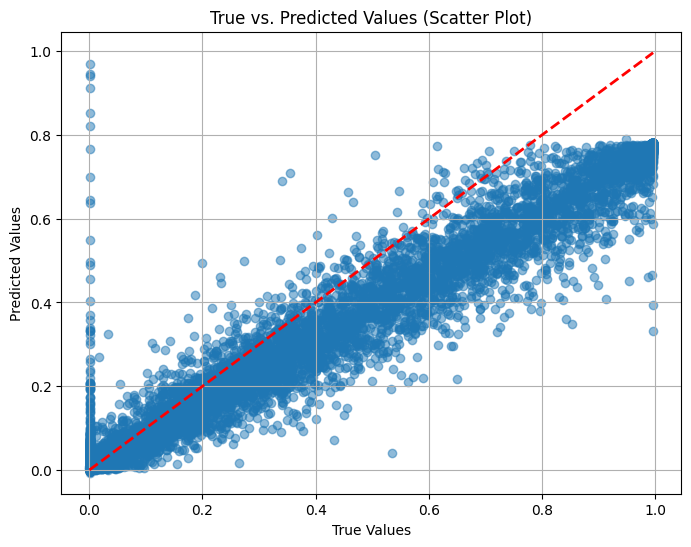

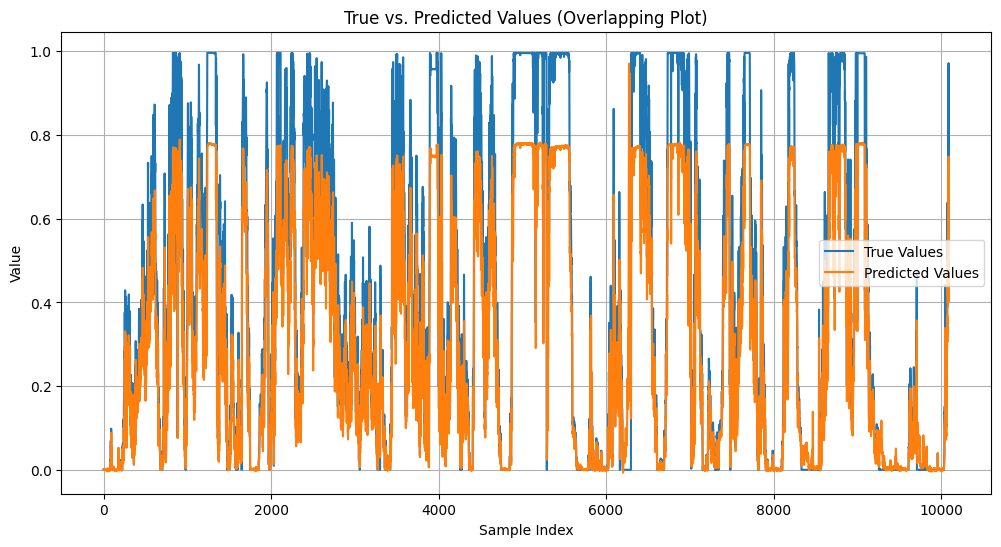

Plotting complete.


In [ ]:
import matplotlib.pyplot as plt

print("\n--- Generating Plots ---")

# 1. True vs. Predicted Values Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.5) # Use the flattened arrays
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--', lw=2) # Ideal y=x line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values (Scatter Plot)")
plt.grid(True)
plt.show()

# 2. Overlapping True and Predicted Values Line Plot
plt.figure(figsize=(12, 6))
# Plot against index if data is sequential or just for visualization
plt.plot(y_test_flat, label="True Values")
plt.plot(y_pred_flat, label="Predicted Values")
plt.xlabel("Sample Index") # Or Time Step if applicable
plt.ylabel("Value")
plt.title("True vs. Predicted Values (Overlapping Plot)")
plt.legend()
plt.grid(True)
plt.show()

print("Plotting complete.")

In [ ]:
# Predict
y_pred = optimized_model.predict(X_test)

# Flatten
y_pred = y_pred.flatten()

# Assume num_features is known (example 3)
num_features = 3

# Create array for inverse transformation
y_pred_full = np.zeros((y_pred.shape[0], num_features))
y_pred_full[:, 0] = y_pred

# Inverse transform
y_pred_inverse = scaler.inverse_transform(y_pred_full)[:, 0]

# For test labels
y_test_full = np.zeros((y_test.shape[0], num_features))
y_test_full[:, 0] = y_test.flatten()
y_test_inverse = scaler.inverse_transform(y_test_full)[:, 0]


316/316 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Bidirectional,
    LSTM,
    Dense,
    Flatten,
    Activation,
    RepeatVector,
    Permute,
    Multiply,
    Lambda,
    Dropout # Added Dropout import for clarity if needed elsewhere, though it's used within LSTM directly
)
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K # Import backend for Lambda function

# Define the input shape (time_steps=10, num_features=3)
input_layer = Input(shape=(10, 3), name='Input_Layer')

# --- Bidirectional LSTM Layers ---
# First BiLSTM layer captures dependencies in both directions
# return_sequences=True is crucial for stacking RNNs and for attention
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2), name='BiLSTM_1')(input_layer)

# Second BiLSTM layer further processes the sequence
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2), name='BiLSTM_2')(x)
# Shape after BiLSTMs: (batch_size, 10, 200) because Bidirectional doubles the units (100 forward + 100 backward)

# --- Custom Attention Mechanism ---
# Calculate attention scores for each time step's output vector
# Dense(1) projects the 200 features down to a single score per time step
attention_scores = Dense(1, activation='tanh', name='Attention_Score_Calc')(x)
# Shape: (batch_size, 10, 1)

# Flatten scores to apply softmax across time steps
attention_scores = Flatten(name='Attention_Flatten')(attention_scores)
# Shape: (batch_size, 10)

# Apply softmax to get attention weights (summing to 1 across time steps)
attention_weights = Activation('softmax', name='Attention_Weights')(attention_scores)
# Shape: (batch_size, 10)

# --- Apply Attention Weights ---
# Repeat the weights vector to match the BiLSTM output dimensions for multiplication
# Need to repeat it 200 times (the dimension of the BiLSTM output)
attention_weights_repeated = RepeatVector(200, name='Attention_Repeat')(attention_weights)
# Shape: (batch_size, 200, 10)

# Permute dimensions to align for element-wise multiplication across time steps
attention_weights_permuted = Permute([2, 1], name='Attention_Permute')(attention_weights_repeated)
# Shape: (batch_size, 10, 200) - aligns with BiLSTM output shape

# Multiply the BiLSTM output sequence by the attention weights
# This scales each time step's output vector based on its importance
weighted_sequence = Multiply(name='Attention_Apply')([x, attention_weights_permuted])
# Shape: (batch_size, 10, 200)

# Sum the weighted vectors across the time dimension to get a single context vector
# This aggregates the information, weighted by attention
context_vector = Lambda(lambda tensors: K.sum(tensors, axis=1), name='Attention_Context_Vector')(weighted_sequence)
# Shape: (batch_size, 200)

# --- Fully Connected Layers ---
# Dense layers process the context vector for final prediction
x = Dense(50, activation='relu', name='Dense_1')(context_vector)
x = Dense(25, activation='relu', name='Dense_2')(x)

# Output layer for regression (single value prediction)
output_layer = Dense(1, name='Output_Layer')(x)
# Shape: (batch_size, 1)

# --- Create and Compile Model ---
optimized_model = Model(inputs=input_layer, outputs=output_layer, name='BiLSTM_Attention_Model')

# Compile the model with Adam optimizer and Mean Squared Error loss
optimized_model.compile(optimizer='adam',
                        loss='mean_squared_error',
                        metrics=['mae']) # Mean Absolute Error

# Print the model summary
optimized_model.summary()

# --- Ready for Training ---
# The model is now defined and compiled.
# You would typically train it next using model.fit():
# history_optimized = optimized_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
# print("Model ready for training.")

Model: "BiLSTM_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer         │ (None, 10, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM_1            │ (None, 10, 200)   │     83,200 │ Input_Layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM_2            │ (None, 10, 200)   │    240,800 │ BiLSTM_1[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Score_Ca… │ (None, 10, 1)     │        201 │ BiLSTM_2[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Flatten   │ (None, 10)        │          0 │ Attention_Score_… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Weights   │ (None, 10)        │          0 │ Attention_Flatte… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Repeat    │ (None, 200, 10)   │          0 │ Attention_Weight… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Permute   │ (None, 10, 200)   │          0 │ Attention_Repeat… │
│ (Permute)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Apply     │ (None, 10, 200)   │          0 │ BiLSTM_2[0][0],   │
│ (Multiply)          │                   │            │ Attention_Permut… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Context_… │ (None, 200)       │          0 │ Attention_Apply[… │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_1 (Dense)     │ (None, 50)        │     10,050 │ Attention_Contex… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_2 (Dense)     │ (None, 25)        │      1,275 │ Dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1)         │         26 │ Dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 335,552 (1.28 MB)

 Trainable params: 335,552 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Assuming you have trained your model and have test data ---
# optimized_model.fit(X_train, y_train, epochs=..., batch_size=..., validation_data=(X_val, y_val))
# y_pred = optimized_model.predict(X_test)

# For demonstration purposes, let's create some dummy data
# Replace this with your actual y_test and y_pred after training
np.random.seed(42)
y_test = 50 + 10 * np.random.randn(100) # Simulate some true values
y_pred = y_test + 5 * np.random.randn(100) # Simulate predictions with some error

# Ensure y_pred has the same shape as y_test if it came from model.predict
# model.predict might output shape (n_samples, 1), reshape to (n_samples,)
if y_pred.shape != y_test.shape:
    y_pred = y_pred.flatten() # Or use np.squeeze(y_pred)

print("--- Evaluation Metrics ---")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.4f}")

print("\n--- Plotting ---")

# 1. True vs. Predicted Values Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal y=x line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.grid(True)
plt.show()

# 2. Overlapping True and Predicted Values Line Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="True Values")
plt.plot(y_pred, label="Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("True vs. Predicted Values Overlapping Plot")
plt.legend()
plt.grid(True)
plt.show()

Generated data shapes:
X_train: (700, 10, 3), y_train: (700,)
X_val: (150, 10, 3), y_val: (150,)
X_test: (150, 10, 3), y_test: (150,)

--- Model Summary ---


Model: "BiLSTM_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer         │ (None, 10, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM_1            │ (None, 10, 200)   │     83,200 │ Input_Layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM_2            │ (None, 10, 200)   │    240,800 │ BiLSTM_1[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Score_Ca… │ (None, 10, 1)     │        201 │ BiLSTM_2[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Flatten   │ (None, 10)        │          0 │ Attention_Score_… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Weights   │ (None, 10)        │          0 │ Attention_Flatte… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Repeat    │ (None, 200, 10)   │          0 │ Attention_Weight… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Permute   │ (None, 10, 200)   │          0 │ Attention_Repeat… │
│ (Permute)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Apply     │ (None, 10, 200)   │          0 │ BiLSTM_2[0][0],   │
│ (Multiply)          │                   │            │ Attention_Permut… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Attention_Context_… │ (None, 200)       │          0 │ Attention_Apply[… │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_1 (Dense)     │ (None, 50)        │     10,050 │ Attention_Contex… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_2 (Dense)     │ (None, 25)        │      1,275 │ Dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 1)         │         26 │ Dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 335,552 (1.28 MB)

 Trainable params: 335,552 (1.28 MB)

 Non-trainable params: 0 (0.00 B)


--- Training Model ---
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - loss: 224.8662 - mae: 13.7492 - val_loss: 38.7229 - val_mae: 5.2367
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 37.9100 - mae: 5.0216 - val_loss: 28.0462 - val_mae: 4.2361
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 28.4542 - mae: 4.2491 - val_loss: 31.1627 - val_mae: 4.3989
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 30.2992 - mae: 4.4234 - val_loss: 28.7508 - val_mae: 4.2524
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 31.2793 - mae: 4.5471 - val_loss: 28.0320 - val_mae: 4.2482
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 29.8632 - mae: 4.4143 - val_loss: 28.1759 - val_mae: 4.2292
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 27.1220 - mae: 4.2233 - val_loss: 28.0297 - val_mae: 4.2626
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 29.7703 - mae: 4.3692 - val_loss: 28.0931 - val_mae: 4.2788
Epoch 9/50
22/22 ━━

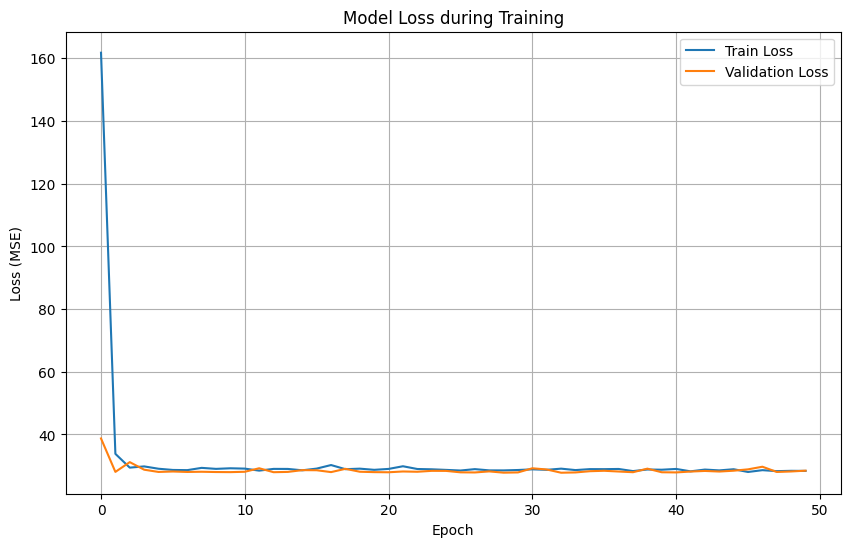

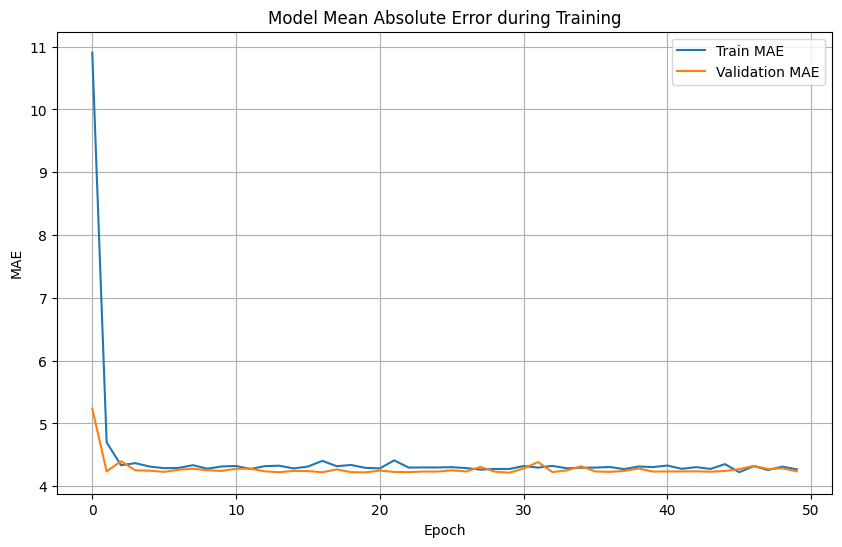

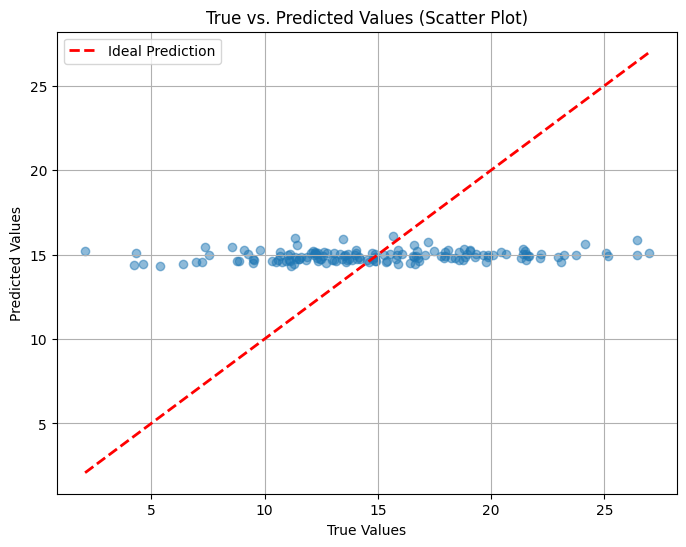

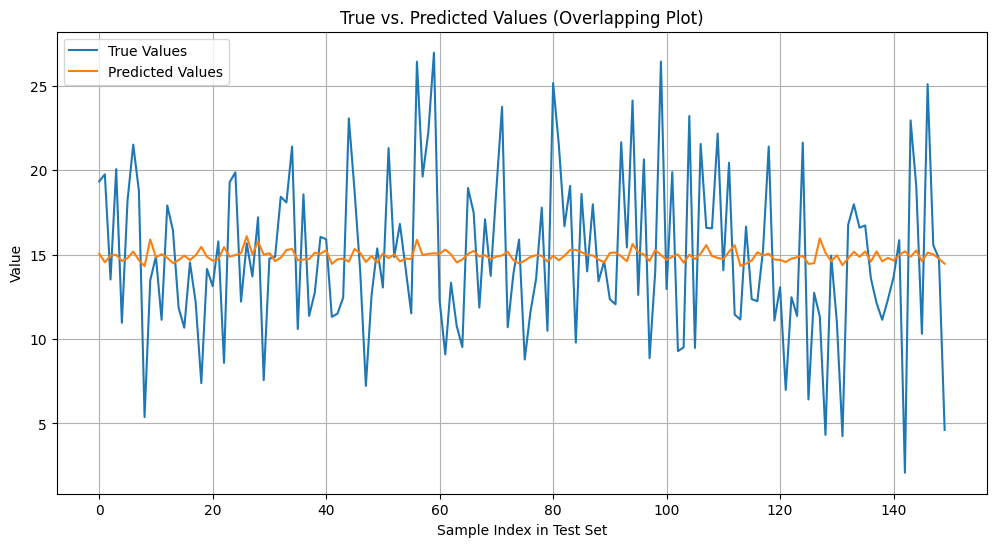

Plotting complete.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import (
    Input,
    Bidirectional,
    LSTM,
    Dense,
    Flatten,
    Activation,
    RepeatVector,
    Permute,
    Multiply,
    Lambda,
    Dropout
)
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K # Import backend for Lambda function

# --- 1. Generate Synthetic Data ---
# Define parameters for data generation
n_samples = 1000 # Total number of samples
time_steps = 10
num_features = 3
train_split = 0.7
val_split = 0.15
test_split = 0.15 # Ensure splits sum to 1

# Generate random input data (X)
X = np.random.rand(n_samples, time_steps, num_features).astype(np.float32)

# Generate synthetic target data (y) based on a simple pattern
# This is just for demonstration; replace with your actual target generation logic
# Example: sum of features across time steps with some noise
y = np.sum(X, axis=(1, 2)) + np.random.randn(n_samples) * 5
y = y.astype(np.float32) # Ensure target data is float32

# Split data into train, validation, and test sets
n_train = int(n_samples * train_split)
n_val = int(n_samples * val_split)
n_test = n_samples - n_train - n_val # Calculate test size to use all data

X_train, y_train = X[:n_train], y[:n_train]
X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

print(f"Generated data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


# --- 2. Define the Model (as provided by the user) ---
# Define the input shape (time_steps=10, num_features=3)
input_layer = Input(shape=(time_steps, num_features), name='Input_Layer')

# --- Bidirectional LSTM Layers ---
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2), name='BiLSTM_1')(input_layer)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2), name='BiLSTM_2')(x)

# --- Custom Attention Mechanism ---
attention_scores = Dense(1, activation='tanh', name='Attention_Score_Calc')(x)
attention_scores = Flatten(name='Attention_Flatten')(attention_scores)
attention_weights = Activation('softmax', name='Attention_Weights')(attention_scores)

# Get the correct dimension for RepeatVector from the BiLSTM output shape
bilstm_output_dim = K.int_shape(x)[-1] # This should be 200 (100*2)

attention_weights_repeated = RepeatVector(bilstm_output_dim, name='Attention_Repeat')(attention_weights)
attention_weights_permuted = Permute([2, 1], name='Attention_Permute')(attention_weights_repeated)

weighted_sequence = Multiply(name='Attention_Apply')([x, attention_weights_permuted])
context_vector = Lambda(lambda tensors: K.sum(tensors, axis=1), name='Attention_Context_Vector')(weighted_sequence)

# --- Fully Connected Layers ---
x = Dense(50, activation='relu', name='Dense_1')(context_vector)
x = Dense(25, activation='relu', name='Dense_2')(x)

# Output layer for regression (single value prediction)
output_layer = Dense(1, name='Output_Layer')(x)

# --- Create and Compile Model ---
optimized_model = Model(inputs=input_layer, outputs=output_layer, name='BiLSTM_Attention_Model')

# Compile the model with Adam optimizer and Mean Squared Error loss
optimized_model.compile(optimizer='adam',
                        loss='mean_squared_error',
                        metrics=['mae']) # Mean Absolute Error

print("\n--- Model Summary ---")
optimized_model.summary()

# --- 3. Train the Model ---
print("\n--- Training Model ---")
history_optimized = optimized_model.fit(
    X_train, y_train,
    epochs=50, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_data=(X_val, y_val),
    verbose=1 # Set to 0 for less verbose output during training
)
print("Training complete.")

# --- 4. Make Predictions on the Test Set ---
print("\n--- Making Predictions on Test Data ---")
y_pred = optimized_model.predict(X_test)

# Flatten predictions for compatibility with sklearn metrics and plotting
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten() if y_test.ndim > 1 else y_test # Ensure y_test is also flat

print("Predictions complete.")

# --- 5. Calculate Evaluation Metrics ---
print("\n--- Evaluation Metrics on Test Data ---")

# Evaluate the model using the compiled metrics (Loss/MSE and MAE)
loss, mae_compiled = optimized_model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss (from evaluate - MSE): {loss:.4f}")
print(f"Test MAE (from evaluate): {mae_compiled:.4f}")

# Calculate additional metrics using sklearn
test_mse = mean_squared_error(y_test_flat, y_pred_flat)
test_rmse = np.sqrt(test_mse)
test_mae_sklearn = mean_absolute_error(y_test_flat, y_pred_flat)
test_r2 = r2_score(y_test_flat, y_pred_flat)

print(f"Calculated Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Calculated Test MAE: {test_mae_sklearn:.4f}")
print(f"Test R-squared (R2) Score: {test_r2:.4f}")

print("-" * 30)

# --- 6. Generate Plots ---
print("\n--- Generating Plots ---")

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history_optimized.history['loss'], label='Train Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(10, 6))
plt.plot(history_optimized.history['mae'], label='Train MAE')
plt.plot(history_optimized.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error during Training')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# True vs. Predicted Values Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.5)
# Add the ideal y=x line
min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values (Scatter Plot)")
plt.legend()
plt.grid(True)
plt.show()

# Overlapping True and Predicted Values Line Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values")
plt.plot(y_pred_flat, label="Predicted Values")
plt.xlabel("Sample Index in Test Set")
plt.ylabel("Value")
plt.title("True vs. Predicted Values (Overlapping Plot)")
plt.legend()
plt.grid(True)
plt.show()

print("Plotting complete.")
